# **Bitcoin Price Prediction**

#### Aim is to build appropriate ML models that will help in predicting the future prices of Bitcoin based on historcal data

**Bitcoin (BTC)** is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining.

The latest known price of Bitcoin is **$68,844.23**

We'll be working on historical prices of Bitcoin over the last 2.5 years (1st Jan, 2020 - 31st December, 2023), and see how accurately we can predict its value for the upcoming period.



## Loading the Data

Entire Data is collected from the website **Yahoo Finance** ([https://finance.yahoo.com/quote/BTC-USD/history/](https://finance.yahoo.com/quote/BTC-USD/history/)

Now for data collection, we can either:

*  Fetch the data from **yfinance** library , OR we can
*  Download our desired data directly from the website and import it using **Pandas**

**For learning purpose, I'll do both the cases.**

In [1]:
#Using Pandas
import pandas as pd

BTC = pd.read_csv('/content/drive/MyDrive/Personal Projects/Bitcoin Price Prediction/BTC_train.csv')
BTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1456,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
1457,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
1458,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
1459,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [ ]:
#Using yfinance
'''import yfinance as yf
from datetime import datetime

start_date= datetime(2022,1,1)
end_date= datetime(2024,7,1)

bitcoin_data = yf.download("BTC-USD",start=start_date,end=end_date)

BTC= pd.DataFrame(bitcoin_data)
BTC'''

'import yfinance as yf\nfrom datetime import datetime\n\nstart_date= datetime(2022,1,1)\nend_date= datetime(2024,7,1)\n\nbitcoin_data = yf.download("BTC-USD",start=start_date,end=end_date)\n\nBTC= pd.DataFrame(bitcoin_data)\nBTC'

Essentialy both gives us the same data, except that downloading the directly from the website doesn't give **Date** as a separate column, we might need it for further EDA purpose.

Hence, we import the data using Pandas



## Exploring the Data

A brief summary of the features in our bitcoin dataframe. Its more like a daily report card for Bitcoin

* **Date:** The day the report is for.
* **Open:** The first price Bitcoin was traded at that day.
* **High:** The highest price Bitcoin reached that day.
* **Low:** The lowest price Bitcoin reached that day.
* **Close:** The price Bitcoin was traded at when the market closed that day.
* **Adj Close:** This is usually the same as Close for Bitcoin, but it can account for things like stock splits in traditional stocks.
* **Volume:** The total number of Bitcoin bought and sold that day (how many times it changed hands).

In [2]:
#Check for NA values
BTC.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


No null values need to be handled

In [3]:
#Check for outliers from the summary
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03
mean,28869.396834,29525.368922,28164.231668,28890.454091,28890.454091,3.211143e+10
std,15125.326925,15521.866504,14658.782312,15114.075468,15114.075468,1.871790e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,16954.146484,17116.041016,16788.783203,16967.132813,16967.132813,1.996863e+10
50%,27301.929688,27820.244141,26864.082031,27307.437500,27307.437500,2.909493e+10
75%,39744.515625,40816.070313,38746.347656,39773.828125,39773.828125,3.925429e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


It is evident that both the columns **Close** and **Adj Close** have the same values, thus one of them is redundant.

Hence, we drop the Adjusted Closing Price column from our dataset

In [4]:
BTC = BTC.drop(['Adj Close'],axis='columns')
BTC

,Date,Open,High,Low,Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...,...
1456,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
1457,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
1458,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055
1459,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,16013925945


In [5]:
BTC.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


Converting the data type of **Date** column from object to datetime

In [6]:
BTC['Date'] = pd.to_datetime(BTC['Date'])
BTC.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


## Exploratory Data Analysis

Text(0, 0.5, 'Price in $')

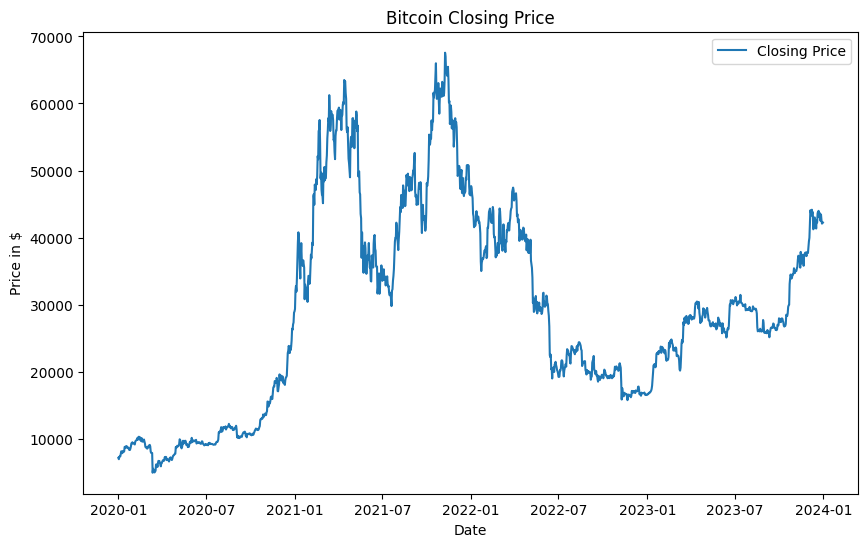

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x=BTC['Date'],y=BTC['Close'],label='Closing Price')
plt.title('Bitcoin Closing Price')
plt.ylabel('Price in $')

**Conclusion:** Price of Bitcoin has fluctuated significantly over the past two and a half years, with some periods of strong growth followed by periods of decline

*  The closing price in July 2024 is significantly higher than the closing price in January 2022. Despite the fluctuations, there appears to be a general upward trend in the price of Bitcoin over the timeframe.

*  The price of Bitcoin has experienced periods of considerable volatility, with sharp increases and decreases. This volatility is a common characteristic of the cryptocurrency market.

* Possible reasons for Bitcoin's price volatility include:
    * **Supply and demand dynamics:** The limited supply of Bitcoin and the ever-changing demand from investors can cause price swings.
    * **Regulatory uncertainty:** Regulations surrounding cryptocurrency can impact investor sentiment and price stability.
    * **News and events:** Positive or negative news events related to Bitcoin or the cryptocurrency market in general can influence prices.

*  Due to the inherent volatility of Bitcoin's price, it's challenging to predict its future movements with certainty. The chart primarily reflects historical data and doesn't necessarily guarantee future trends, future price movements will depend on various factors.  

<ipython-input-8-e71793655a08>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


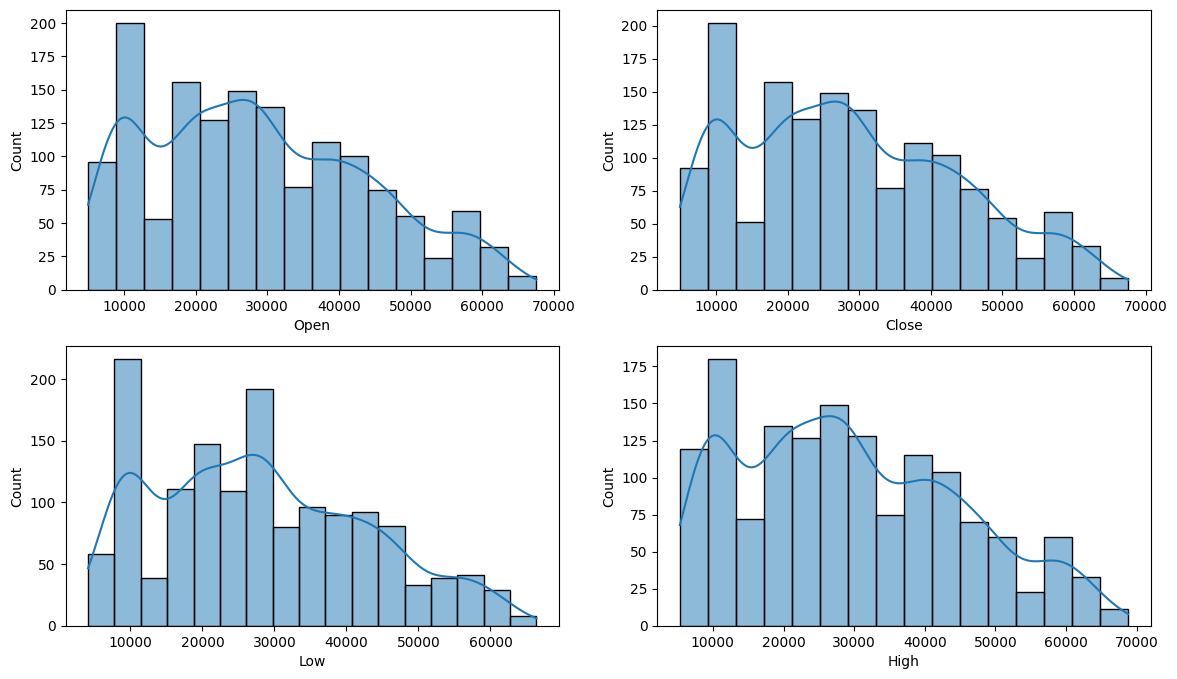

In [8]:
features=['Open','Close','Low','High']
plt.subplots(figsize=(14,8))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.histplot(x=BTC[col],kde=True)

The plotted histograms show the distribution of the four variables including a kernel density plot.

For all the plots:
*  Distribution show a prominent peak around 20,000 to 30,000.
*  There's a smaller peak around 60,000 to 70,000, indicating that there were significant periods when the actual stock prices were in this higher range.
*  A dip around 40,000 to 50,000 suggests fewer instances of stock prices in this range.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

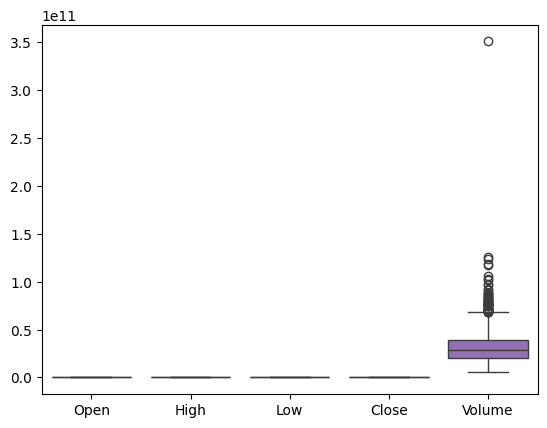

In [9]:
sns.boxplot(data=BTC)

Boxlpot shows presence of outliers in the **Volume** feature, whose importance will be analyzed further ahead

Text(0.5, 1.0, 'High vs Low')

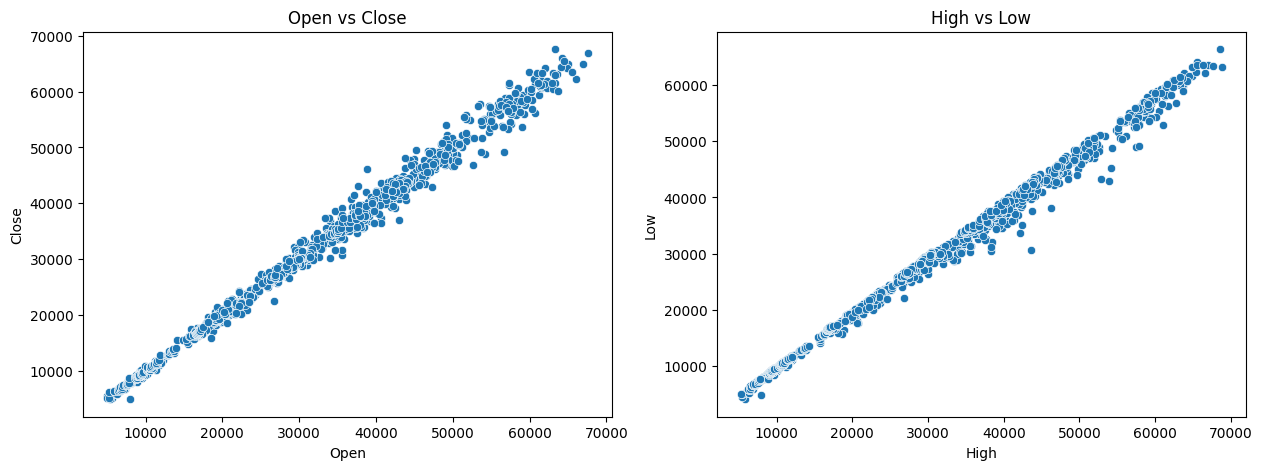

In [10]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(x=BTC['Open'],y=BTC['Close'],ax=axes[0])
axes[0].set_title("Open vs Close")
sns.scatterplot(x=BTC['High'],y=BTC['Low'],ax=axes[1])
axes[1].set_title("High vs Low")

With the help of scatterplot, we showcase the relation between **Opening Price** vs **Closing Price** and **High** vs **Low** respectively.

For both of the plots there is strong Positive Correlation suggesting that the variables are closely related to each other

In [11]:
!pip install colorama

In [12]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

In [13]:
bitcoindf = pd.read_csv('/content/drive/MyDrive/Personal Projects/Bitcoin Price Prediction/BTC_train.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [14]:
bitcoindf = bitcoindf.fillna(method = 'ffill')

<ipython-input-14-0319ec1241e9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoindf = bitcoindf.fillna(method = 'ffill')


In [15]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2020-01-01 00:00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02 00:00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03 00:00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04 00:00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05 00:00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


Text(0.5, 1.0, 'Bitcoin Close Price')

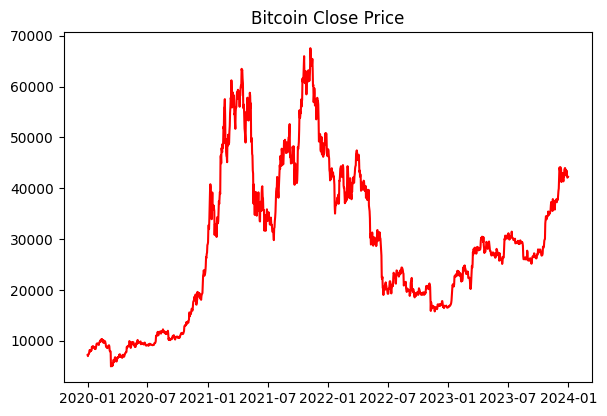

In [16]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

In [17]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '01-2023']

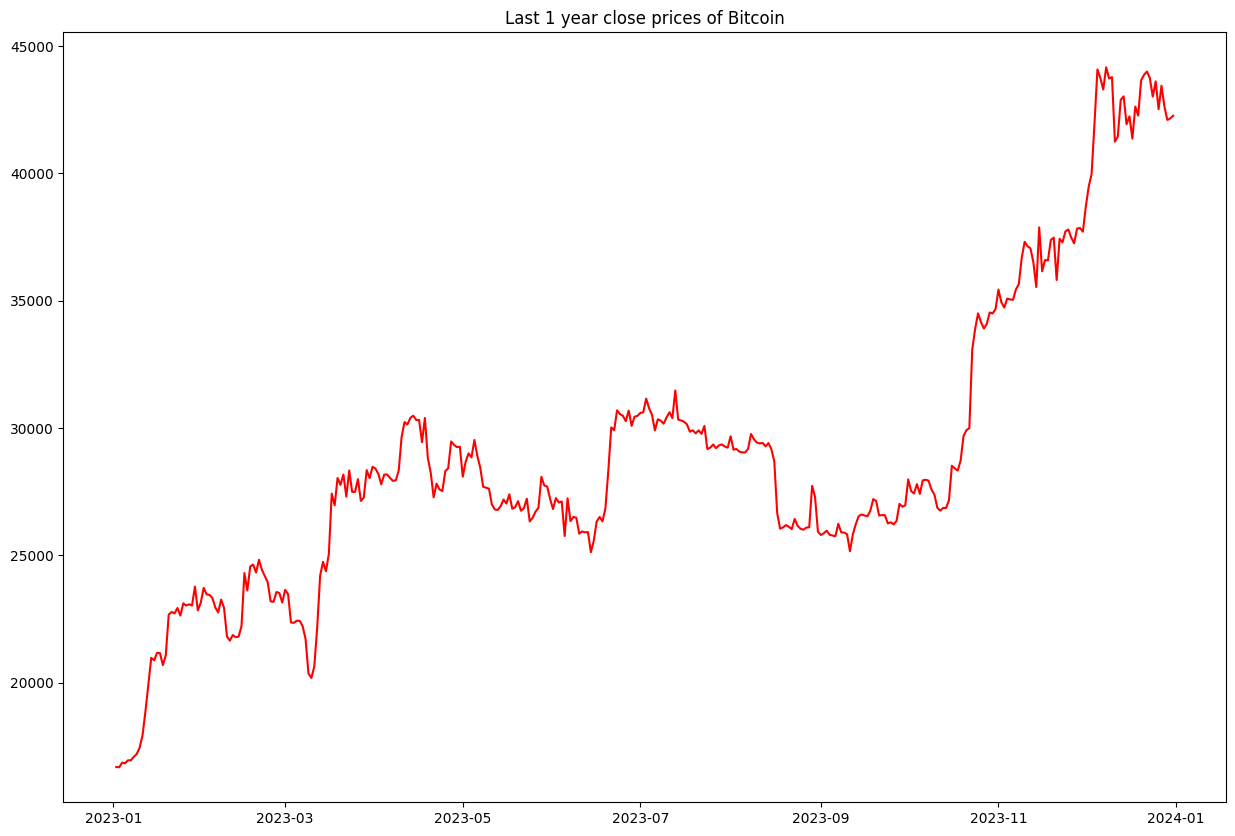

In [18]:
fig = plt.figure(figsize = (15,10))
plt.title("Last 1 year close prices of Bitcoin")
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")

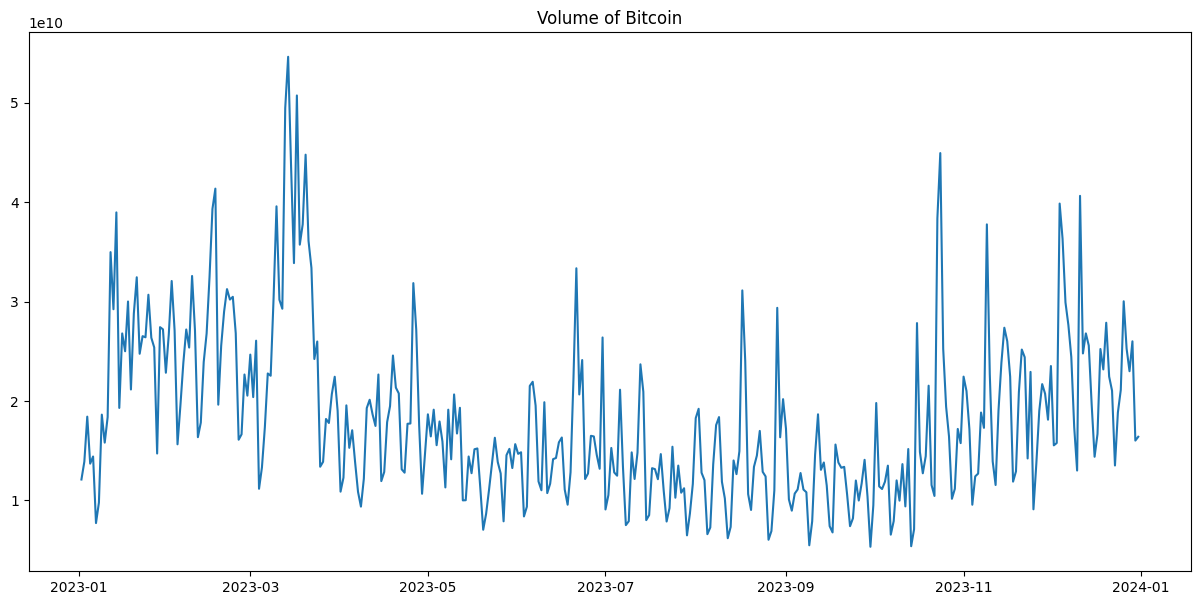

In [19]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
plt.title('Volume of Bitcoin')
plt.show()

In [20]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '11-2023']

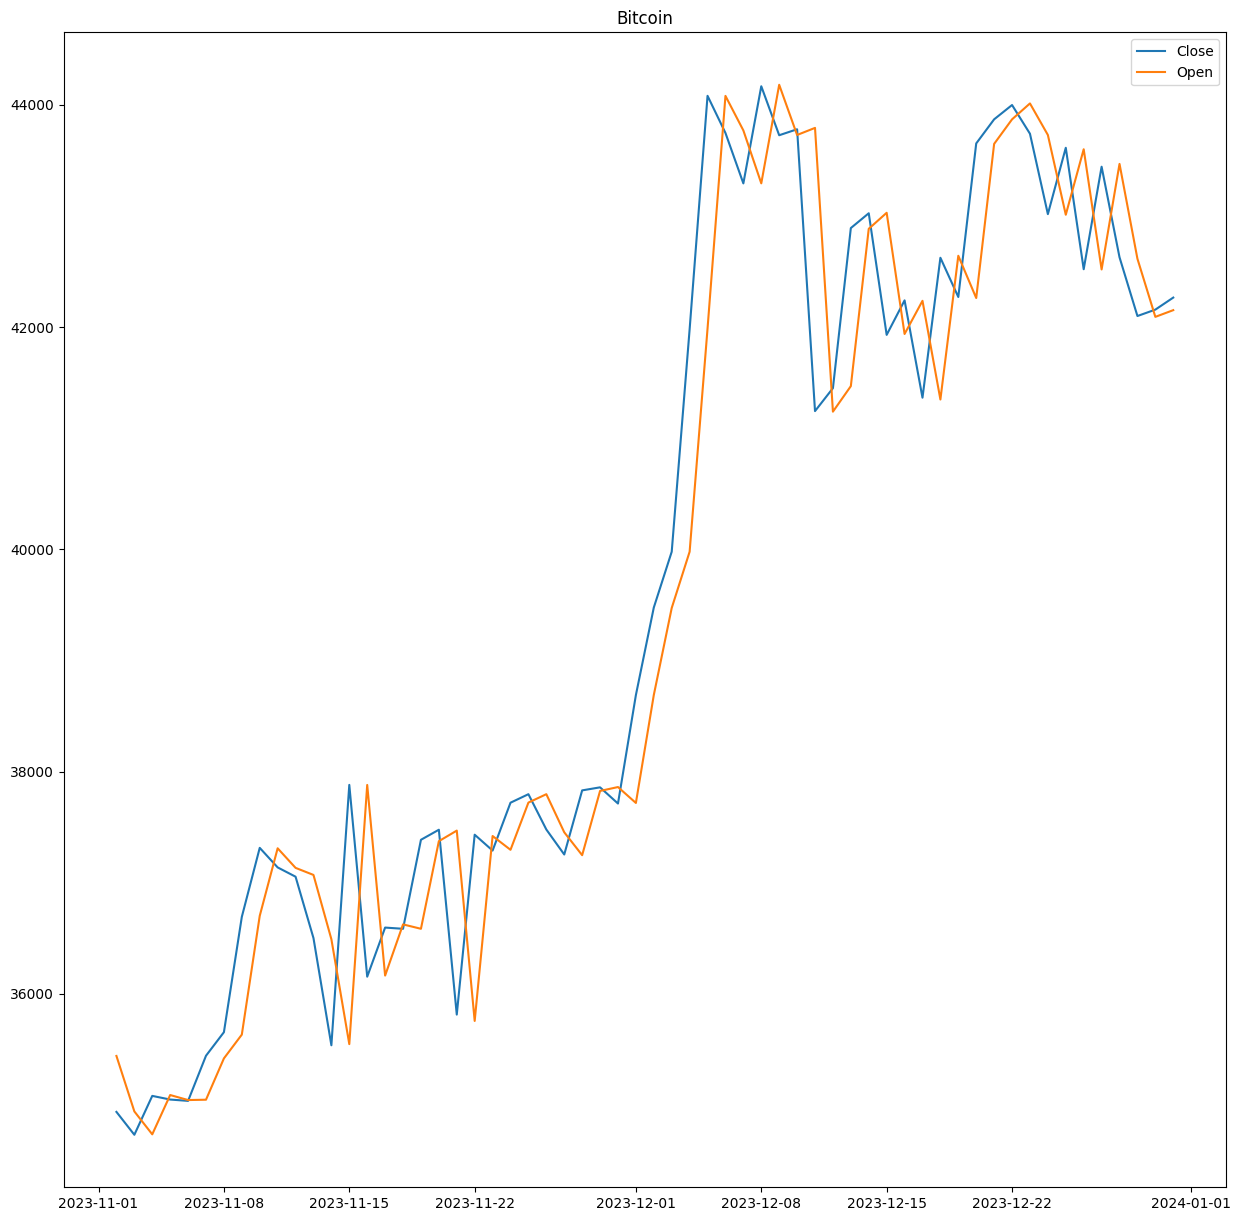

In [22]:
fig = plt.figure(figsize = (15,15))
fig.tight_layout()

plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["Close", "Open"])
plt.title("Bitcoin")
plt.show()

Text(0.5, 1.0, 'Bitcoin Close Price moving average')

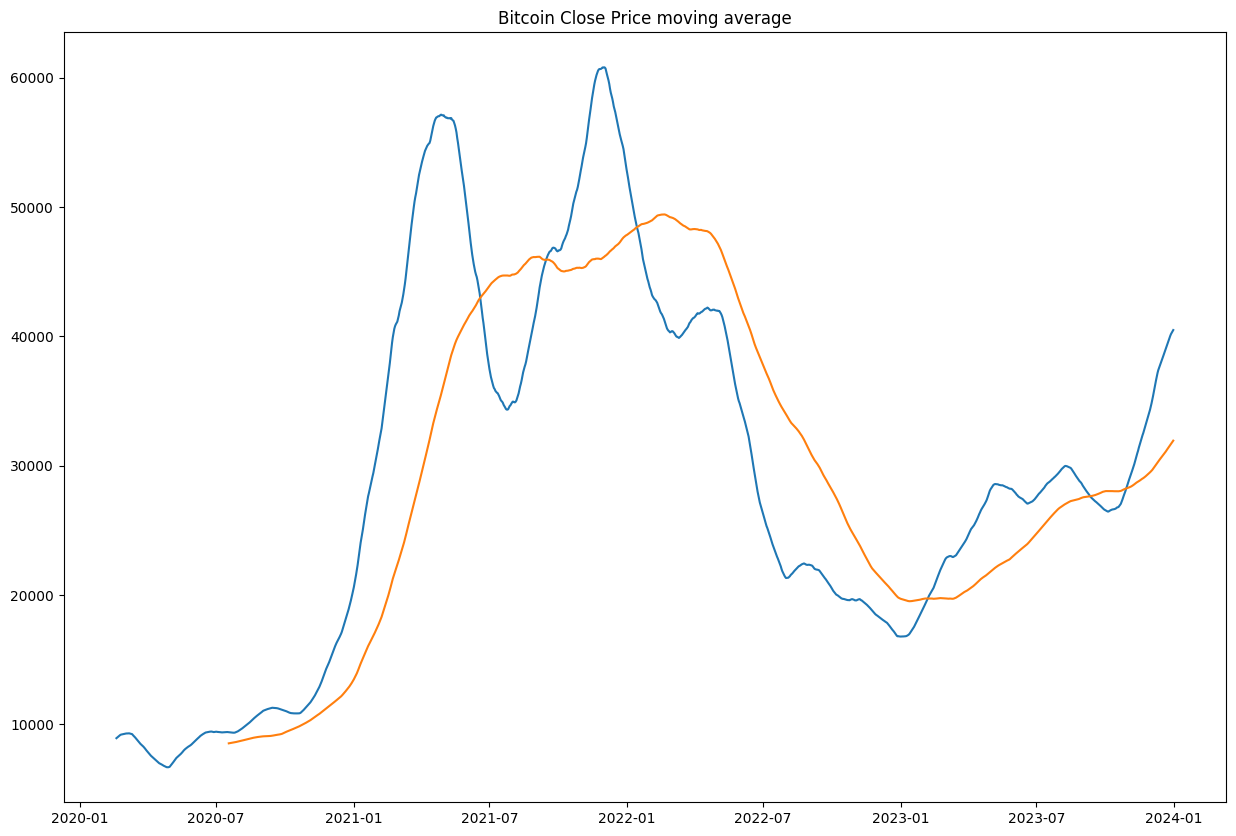

In [23]:
fig = plt.figure(figsize = (15,10))

plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

Text(50000, 400, 'Bitcoin Close Price')

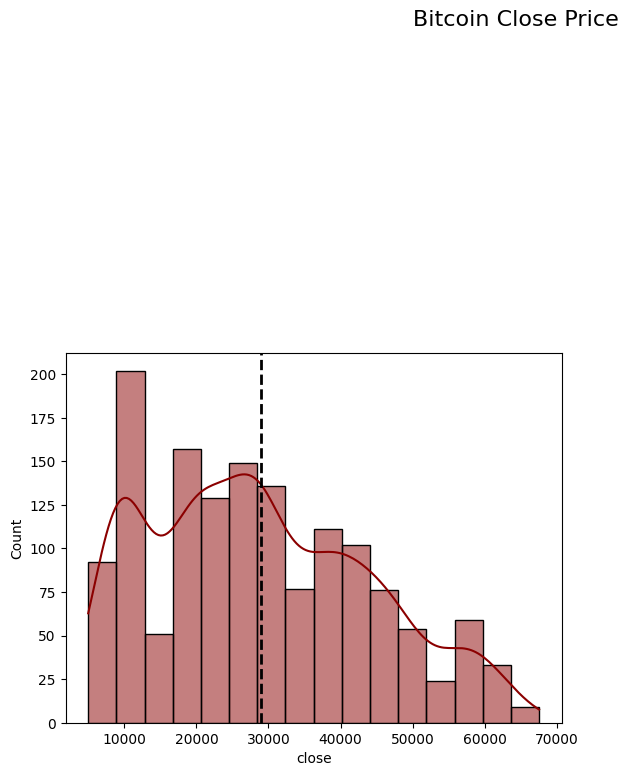

In [24]:
sns.histplot(bitcoindf['close'],color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(50000,400,'Bitcoin Close Price', fontsize=16)

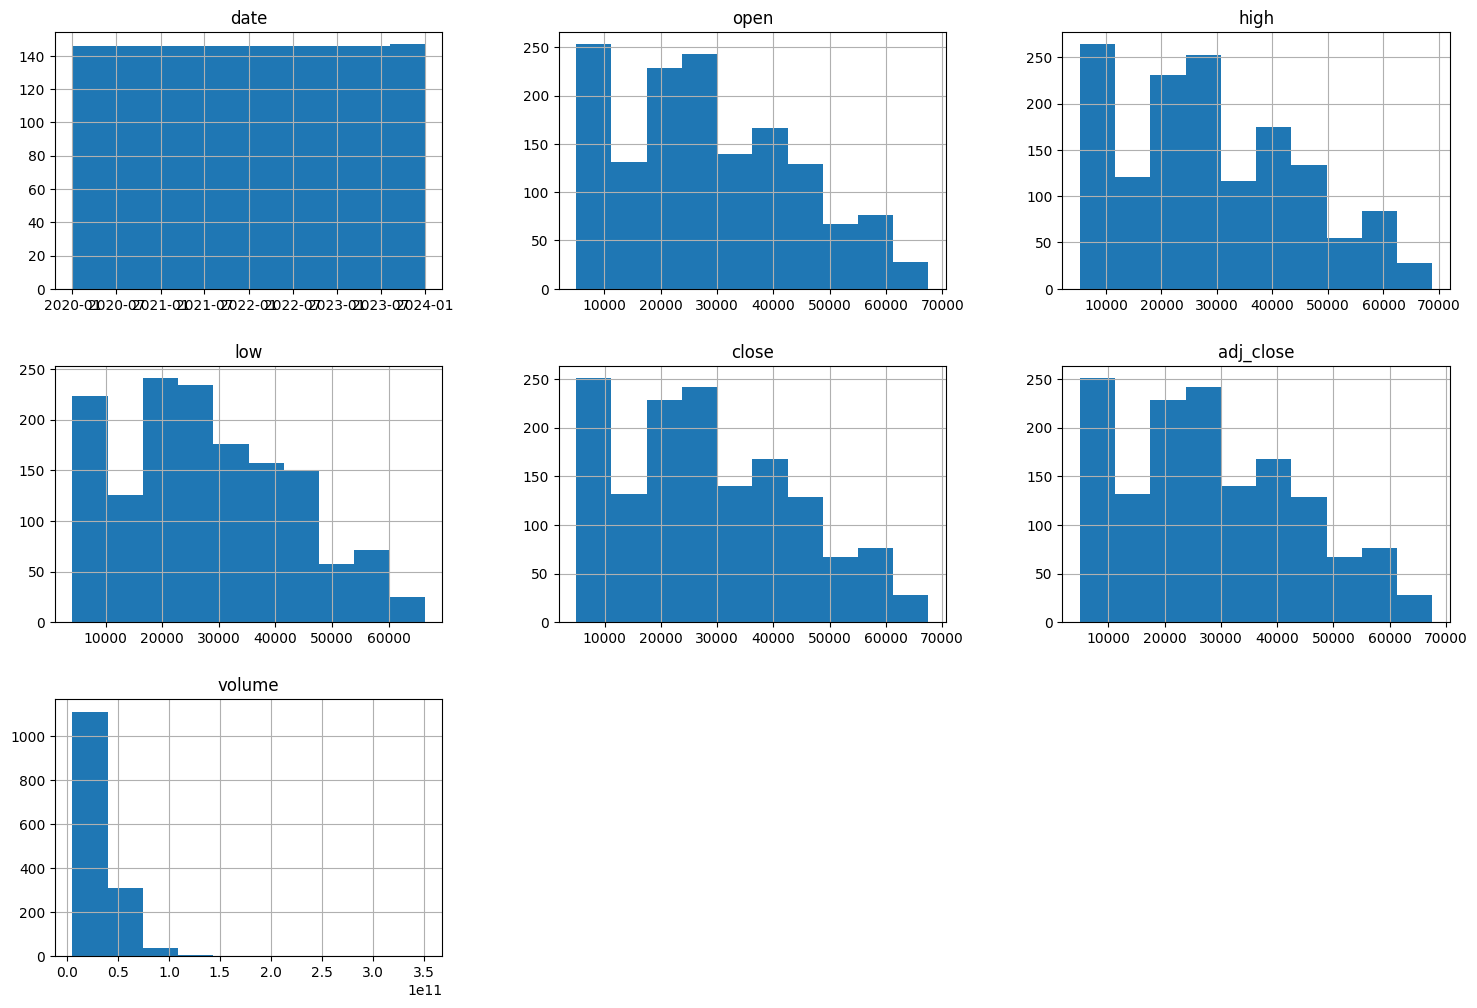

In [25]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

### Bitcoin Close Price Prediction

In [26]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1461, 2)


In [27]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1204


In [28]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1204, 1)


Normalizing close price value

In [29]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (842, 1)
test_data:  (362, 1)


Separate data for Train and Test

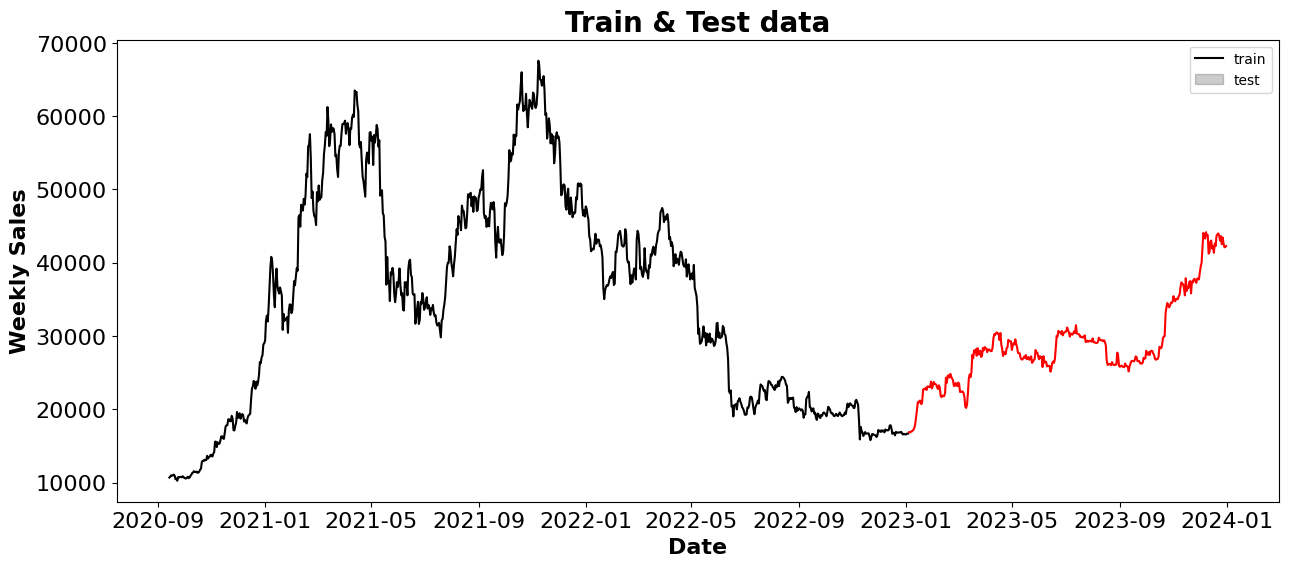

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:842], y = close_stock['close'][:842], color = 'black')
sns.lineplot(x = close_stock['date'][842:], y = close_stock['close'][842:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Prepare train data for time series analysis

In [32]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (826, 15)
y_train:  (826,)
X_test:  (346, 15)
y_test (346,)


In [33]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Import XGBRegressor module and Fit X_train and y_train for training mode

In [34]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.026458401057405448
Root Mean squared Error - RMSE : 0.0329440132720013


Model Testing and Evaluation

In [35]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (826, 1)
Test data prediction: (346, 1)


In [36]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [37]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1204, 1)
Test predicted data:  (1204, 1)


In [38]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Prediction for next 10 days

In [39]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [40]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()